#Polynomial Regression

This colab implements polynomial regression from scratch with basic python libraties like `numpy`. Recall that polynomial regression is linear regression wtih  an additional step of polynomial transformation.
    
    Features --> polynomial transformation --> Linear regression --> Label
we will use `LinReg` class that implements linear regression model.
We will implement:
* Polynomial transformation function.

A few helper function for 
* Generation of training data with non-linear relationship between features and labels. We generate examples with single features $x_1$ and label $y$.
* Visualization of training data and model fitment.

We use polynomial transformations of different degress for modeling realtionship between input features and labels.Each degree results in a new polynomial model. Thus, we have multiple polynomial models from which we need to select the best performing model. We have implemented the model selection scheme towards the end of this colab.


##Polynomial transformation

Steps for generating polynomial transformation of degree *M*.
1. Generate combination of input features of lengths $= 0,1,\ldots, \textit M.$
2. Perform multiplication operation between features to obtain the new features.


For example:
* For a single feature $x_1$ $ \phi_m = [1,x_1^1,x_1^2, \ldots , x_1^m]$
  * Generate combinations of $\{1,x_1,(x_1,x_1), (x_1,x_1,x_1),\ldots, (x_1,x_1), \ldots, (m times)\}$
    * 0-th degree: 1
    * 1st degree: $x_1$
    * 2nd degree: $x_1,x_1$
    * 3rd degree: $x_1,x_1,x_1$
    * mth degree:$(x_1,x_1,x_1,\ldots ,m \ times)$
  * Taking the product of elements in combination:

## Step 1: Importing basic libraries

In [ ]:
from IPython.display import Math, Latex , display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##Step 2: Linear Regression 

In [ ]:
class LinReg(object):
  '''Linear Regression
  ----------------------
  X: feature matrix
  y: label vector
  w: weight vector
  y = X@w
  '''

  def __init__(self):
    self.to = 200
    self.t1 = 1000

  def predict(self,X:np.ndarray):           

    y = X @ self.w
    return y

  def loss(self,X:np.ndarray,y:np.array):

    e = y - self.predict(X)  
    return (1/2)*(np.transpose(e) @ e)



  def rmse(self,X:np.ndarray , y:np.array):
    return np.sqrt((2/X.shape[0])*(self.loss(X,y)))

  def fit(self,X:np.ndarray, y:np.array):
    self.w =  np.linalg.pinv(X) @ y
    return self.w



  def calculate_gradient(self,X:np.ndarray , y:np.array):
    return np.transpose(X) @ (self.predict(X)-y)

  def update_weights(self, grad:np.ndarray , lr:float):
    return (self.w - lr*grad)

  def learning_schedule(self,t):
    return self.to/(t + self.t1)

  def gd(self,X:np.ndarray , y:np.array , num_epochs:int, lr:float):
    '''num_epochs = number of iterations
      lr: learning rate'''
    self.w = np.zeros((X.shape[1])) #intialize the weight vector as zero vector
    self.w_all = []
    self.err_all  = []
    for i in np.range(0,num_epochs):
      dJdW = self.calculate_gradient(X, y)
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X,y))
      self.w = self.update_weights(dJdW, lr)
    return self.w

  def mini_batch_gd(self,X:np.ndarray,y:np.ndarray, num_iters:int,minibatch_size:int):
    '''
    Estimates parameters of linear regression model through gradeint descent

    Args:
      1: X: Feature matrix for training data
      2: y: Label vector for training data
      3: num_iters : Number of iterations
    '''
    w_all =[] # All parameters across iterations
    err_all =[] # Error across itertations

    # Parameter vector initialized to [0,0]

    self.w = np.zeros((X.shape[1]))
    self.t = 0

    for epoch in range(num_iters):
      shuffled_indices = np.random.permutation(X.shape[0])
      X_shuffled = X[shuffled_indices]
      y_shuffled = y[shuffled_indices]

      for i in range(0,X.shape[0], minibatch_size):
        self.t += 1
        xi = X_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        err_all.append(self.loss(xi,yi,w))

        gradients = 2/minibatch_size * self.calculate_gradient(xi,yi,w)
        lr = self.learning_schedule(self.t)

        w = self.update_weights(w,gradients,lr)
        w_all.append(w)

    return self.w  
  def sgd(self,X:np.ndarray,y:np.ndarray, num_epochs:int):
    '''
      Estimates the parameters of linear regression model through Gradient descent

      Args:
          1: X: Feature matrix for training data
          2: y: Label matrix for training data
          3: num_epochs : Number of epochs
      Returns:
        Weight vector: Final weight vector
        Error vector across different Iterations
        Weight vectors across different Iterations

    '''
    self.w_all = [] # all parameters across iterations
    self.err_all = [] # error across iterations

    # Parameter vector initialized to [0,0]

    self.w = np.zeros((X.shape[0]))

    for epoch in range(num_epochs):
      for i in range(X.shape[0]):
        random_index = np.random.randint(X.shape[0])
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi))

        gradients = 2 * self.calculate_gradient(xi,yi)
        lr = self.learning_schedule(num_epochs* X.shape[0]+i)

        self.w = self.update_weights(gradients,lr)
       

    return self.w







## Step 3: Polynomial Transformation

In [ ]:
import functools
import itertools

def get_combinations(x , degree):# This function takes ‘degree’ as input here ‘degree’ represents the size of different combinations that are possible for x
  return itertools.combinations_with_replacement(x,degree)

def compute_new_features(items):
  return functools.reduce(lambda x,y: x * y ,items) #it multiplies first two element and then multiply the result with succeding element until the list is empty
  # if items = [1,2,3,4] then the above function returns ((1*2)*3)*4

Lets run get_combinations on few examples

In [ ]:
{items:compute_new_features(items
) for items in get_combinations(np.array([1]),3)}

{(1, 1, 1): 1}

In [ ]:
import numpy as np
import functools
import itertools

def polynomial_transform(x,degree,logging = False):
  if x.ndim == 1:
    x = x[:,None]
  x_t = x.transpose()
  features  = [np.ones(len(x))]

  if logging:
    print('Input',x, features)  

  for degree in range(1,degree+1):
    for items in get_combinations(x_t,degree):
      features.append(compute_new_features(items))
      if logging:
        print(items, ':',compute_new_features(items))
  if logging:
    print(np.asarray(features).T)
  return np.asarray(features).T




In [ ]:
polynomial_transform(np.array([2,3]),2,logging  = False)

array([[1., 2., 4.],
       [1., 3., 9.]])

# Non linear data generation

In [ ]:
def create_nonlin_training_set(func,sample_size,std):
  x = np.linspace(0,1,sample_size)
  y = func(x) + np.random.normal(scale = std, size = x.shape)
  return x,y


def nonlin(x):
  return np.sin(2*np.pi*x) 

In [ ]:
#Visualization
def visualize_training_data(X_train,y_train):
  points = np.linspace(0,1,100) 
  output = nonlin(points)

  plt.scatter(X_train, y_train , facecolor = 'none',edgecolor ='red', s= 50,
              label = 'training data')
  plt.plot(points, output, c = 'g', label = '$\sin(2\pi x)$'  )
  plt.xlabel('$x_1$')
  plt.ylabel('y')
  plt.legend()
  plt.show()

def visualize_model_fit(X, y, lin_reg, degree ,reg_rate = 0):
    points = np.linspace(0, 1, 100)
    output = nonlin(points)
    
    if degree  > 0:
        plt.scatter(X, y, s=50)
    plt.plot(points, output, c='b')
    
    y_hat = lin_reg.predict(polynomial_transform(points, degree,logging=False)) 
    plt.plot(points,y_hat, c = 'r', label = 'predicted')
    plt.legend()
   
    plt.ylim(-1.5,1.5)
    plt.title('M ={}'.format(degree))
    

   

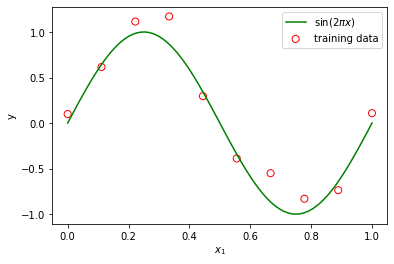

In [ ]:
num_samples  = 10
X, y = create_nonlin_training_set(nonlin , num_samples, 0.2)
visualize_training_data(X,y)

# Polynomial model

(10,)
[ 9.93428306e-02  2.83070648e+01 -5.22064677e+02  4.31980690e+03
 -1.75767780e+04  3.84292338e+04 -4.66561786e+04  3.02002697e+04
 -8.74708057e+03  5.24493544e+02]


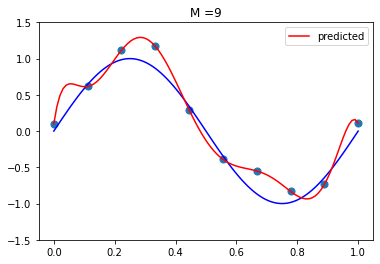

In [ ]:
degree = 9
X_transform = polynomial_transform(X, degree,logging = False)
lin_reg = LinReg()
print(y.shape)
lin_reg.fit(X_transform , y)
visualize_model_fit(X,y,lin_reg,degree)
print(lin_reg.w)

In [ ]:
m = np.linspace(0 , 1 , 3)

In [ ]:
m

array([0. , 0.5, 1. ])

In [ ]:
m_transform = polynomial_transform(m, 3,logging = True)
m_transform

Input [[0. ]
 [0.5]
 [1. ]] [array([1., 1., 1.])]
(array([0. , 0.5, 1. ]),) : [0.  0.5 1. ]
(array([0. , 0.5, 1. ]), array([0. , 0.5, 1. ])) : [0.   0.25 1.  ]
(array([0. , 0.5, 1. ]), array([0. , 0.5, 1. ]), array([0. , 0.5, 1. ])) : [0.    0.125 1.   ]
[[1.    0.    0.    0.   ]
 [1.    0.5   0.25  0.125]
 [1.    1.    1.    1.   ]]


array([[1.   , 0.   , 0.   , 0.   ],
       [1.   , 0.5  , 0.25 , 0.125],
       [1.   , 1.   , 1.   , 1.   ]])

In [ ]:
X_transform

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.11111111e-01, 1.23456790e-02, 1.37174211e-03,
        1.52415790e-04, 1.69350878e-05, 1.88167642e-06, 2.09075158e-07,
        2.32305731e-08, 2.58117479e-09],
       [1.00000000e+00, 2.22222222e-01, 4.93827160e-02, 1.09739369e-02,
        2.43865264e-03, 5.41922810e-04, 1.20427291e-04, 2.67616202e-05,
        5.94702672e-06, 1.32156149e-06],
       [1.00000000e+00, 3.33333333e-01, 1.11111111e-01, 3.70370370e-02,
        1.23456790e-02, 4.11522634e-03, 1.37174211e-03, 4.57247371e-04,
        1.52415790e-04, 5.08052634e-05],
       [1.00000000e+00, 4.44444444e-01, 1.97530864e-01, 8.77914952e-02,
        3.90184423e-02, 1.73415299e-02, 7.70734663e-03, 3.42548739e-03,
        1.52243884e-03, 6.76639485e-04],
       [1.00000000e+00, 5.55555556e-01, 3.08641975e-01, 1.71467764e-01,
   

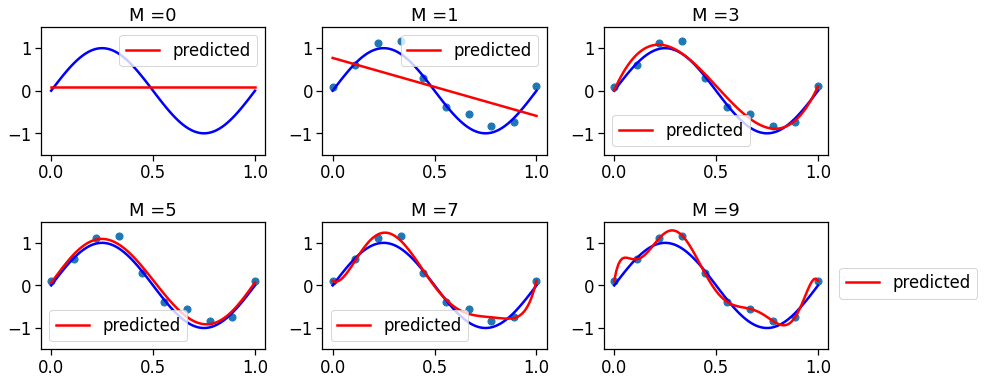

In [ ]:
f = plt.figure(figsize = (12,8))
sns.set_context('notebook', font_scale = 1.5 , rc ={'lines.linewidth':2.5})
#This affects things like the size of the labels, lines, and other elements of the plot, but not the overall style.

for i, degree in enumerate([0, 1, 3, 5, 7,9]):
  plt.subplot(3, 3, i+1)
  X_transform = polynomial_transform(X, degree, logging = False)
  lin_reg = LinReg()
  lin_reg.fit(X_transform,y)
  visualize_model_fit(X, y, lin_reg, degree)

f.tight_layout()
plt.legend(bbox_to_anchor = (1.05, 0.64), loc = 2, borderaxespad = 0.)
plt.show()



